## Install required libraries

In [1]:
#!pip install opencv-python

In [2]:
#!pip install cvlib

     |████████████████████████████████| 13.1 MB 4.7 MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046385 sha256=ca2606351ccf9480cedccd03329c80d047c572e389be1179843dc41c996c3c31
  Stored in directory: /root/.cache/pip/wheels/8e/d7/31/bc643bd3a8b11a7368b1ab1d8a6299b33b462ed0b0683ddc5a
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=ae1c3427a72479078a31470b133d773638aa5c8b66180cef8cbe8027c1f7fa65
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built cvlib progressbar


## Import required libraries

In [3]:
import cv2
import cvlib as cv
import sys
import numpy as np
from numpy.lib.type_check import imag

## Load the image

In [45]:
image = cv2.imread("Female1.jpg")

## Detect face from image

In [46]:
face, confidence = cv.detect_face(image)
padding = 20

In [62]:
face, confidence

([[94, 32, 162, 134]], array([0.990035  , 0.00996498], dtype=float32))

### Add rectangle in the image with label and confidence

In [47]:
for i in face:
    (x, y) = max(0, i[0]-padding), max(0, i[1]-padding)
    (x2, y2) = min(image.shape[1]-1, i[2]+padding), min(image.shape[0]-1,i[3]+padding)
    cv2.rectangle(image, (x, y), (x2, y2), (0, 255, 0), 2)
    crop = np.copy(image[y:y2, x:x2])
    (label, confidence) = cv.detect_gender(crop)
    idx = np.argmax(confidence)
    label = label[idx]
    label = "{}: {:.2f}%".format(label, confidence[idx] * 100)
    Y = y - 10 if y -10 > 10 else y + 10
    cv2.putText(image, label, (y, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

## Show the image

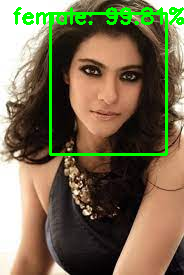

In [49]:
#cv2.imshow("Gender Detection", image)
#cv2.imshow("Gender Detection", image)

#cv2.imshow is not supported in Google Colab, so using its replacement function here
from google.colab.patches import cv2_imshow
cv2_imshow(image)

## Clear all windows

In [50]:
cv2.waitKey()
cv2.destroyAllWindows()

## Load another image and just show the labels

In [51]:
image2 = cv2.imread("Male1.jpg")

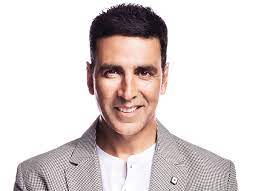

In [63]:
face, confidence = cv.detect_face(image2)

crop = np.copy(image2)
(label, confidence) = cv.detect_gender(crop)

cv2_imshow(image2)

### Show the model output

In [60]:
label, confidence

(['male', 'female'], array([0.990035  , 0.00996498], dtype=float32))